Problem statement:
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [ ]:
#collecting the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the data
df=pd.read_csv("C:\\Users\\acer\\Downloads\\Student_Performance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

Checking the Data

In [ ]:
#Checking the missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
#Checking Duplicates
df.duplicated().sum()

0

In [ ]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
# Check the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
# Check statistics of data set
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


EDA (Exploratory data analysis)

In [ ]:
print("Categories in 'gender' variable:",end=" ")
print(df["gender"].unique())
print("Categories in 'race/ethnicity' variable:",end=" ")
print(df["race/ethnicity"].unique())
print("Categories in 'parental level of education' variable:",end=" ")
print(df["parental level of education"].unique())
print("Categories in 'lunch' variable:",end=" ")
print(df["lunch"].unique())
print("Categories in 'test preparation course	' variable:",end=" ")
print(df["test preparation course"].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race/ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course	' variable: ['none' 'completed']


In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [ ]:
#Adding the total and average
df['Total'] = df['math score'] + df['reading score'] + df['writing score']
df['Average'] = df['Total']/3

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
#Printing Top Scores
print(f"Number of Students who has scored 100 in any one the subjects :{df[(df['math score']==100) |(df['reading score']== 100) | (df['writing score']== 100)]['gender'].count()}")
df[(df['math score']==100) |(df['reading score']== 100) | (df['writing score']== 100)]

Number of Students who has scored 100 in any one the subjects :23


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total,Average
106,female,group D,master's degree,standard,none,87,100,100,287,95.666667
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.666667
149,male,group E,associate's degree,free/reduced,completed,100,100,93,293,97.666667
165,female,group C,bachelor's degree,standard,completed,96,100,100,296,98.666667
179,female,group D,some high school,standard,completed,97,100,100,297,99.000000
377,female,group D,master's degree,free/reduced,completed,85,95,100,280,93.333333
381,male,group C,associate's degree,standard,completed,87,100,95,282,94.000000
403,female,group D,high school,standard,completed,88,99,100,287,95.666667
451,female,group E,some college,standard,none,100,92,97,289,96.333333
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.000000


Data preprocessing

In [ ]:
#Preparing X and Y variables
X = df.drop(columns=['math score'],axis=1)
y = df['math score']

In [ ]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,71,65,195,65.000000
998,female,group D,some college,standard,completed,78,77,223,74.333333


In [ ]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [ ]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

num_features, cat_features

(Index(['reading score', 'writing score', 'Total', 'Average'], dtype='object'),
 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
        'test preparation course'],
       dtype='object'))

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.39149181,
         0.34357423,  0.34357423],
       [ 1.        ,  0.        ,  0.        , ...,  1.31326868,
         1.0219275 ,  1.0219275 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.64247471,
         1.74706375,  1.74706375],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.20107904,
        -0.19443008, -0.19443008],
       [ 1.        ,  0.        ,  0.        , ...,  0.58901542,
         0.46053169,  0.46053169],
       [ 1.        ,  0.        ,  0.        , ...,  1.18158627,
         1.06871048,  1.06871048]])

Separating dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 21), (800,), (200, 21), (200,))

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

In [ ]:
model = model.fit(X_train, y_train)

In [ ]:
model

LinearRegression()

Testing Part

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[:5]

array([91., 53., 80., 74., 84.])

Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
mae, rmse, r2 = evaluate_model(y_test, y_pred)
print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(rmse))
print("- Mean Absolute Error: {:.4f}".format(mae))
print("- R2 Score: {:.4f}".format(r2))

Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Visualization of y_pred and y_test

Text(0, 0.5, 'Predicted')

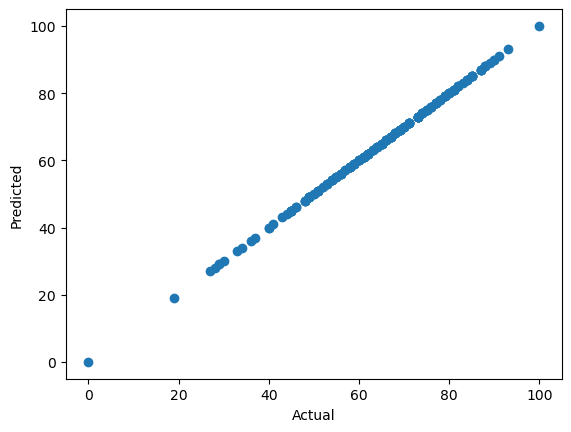

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

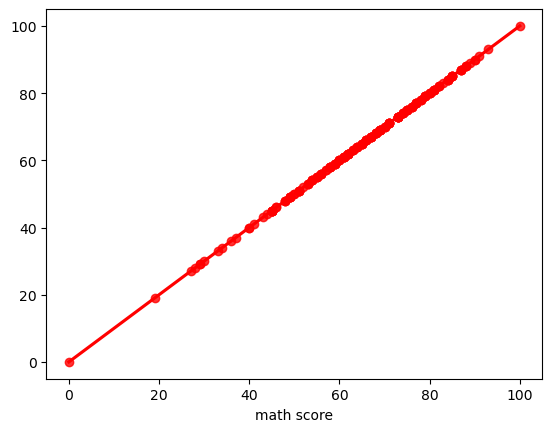

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [ ]:
#Differene between Actual and predicted
pred_df=pd.DataFrame({"Actual value":y_test,"predicted value":y_pred,"Difference":y_test-y_pred})
pred_df

,Actual value,predicted value,Difference
521,91,91.0,-1.989520e-13
737,53,53.0,2.131628e-14
740,80,80.0,-7.105427e-14
660,74,74.0,-8.526513e-14
411,84,84.0,-1.705303e-13
...,...,...,...
408,52,52.0,1.421085e-13
332,62,62.0,1.278977e-13
208,74,74.0,-9.947598e-14
613,65,65.0,-7.105427e-14


Data Visualization

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

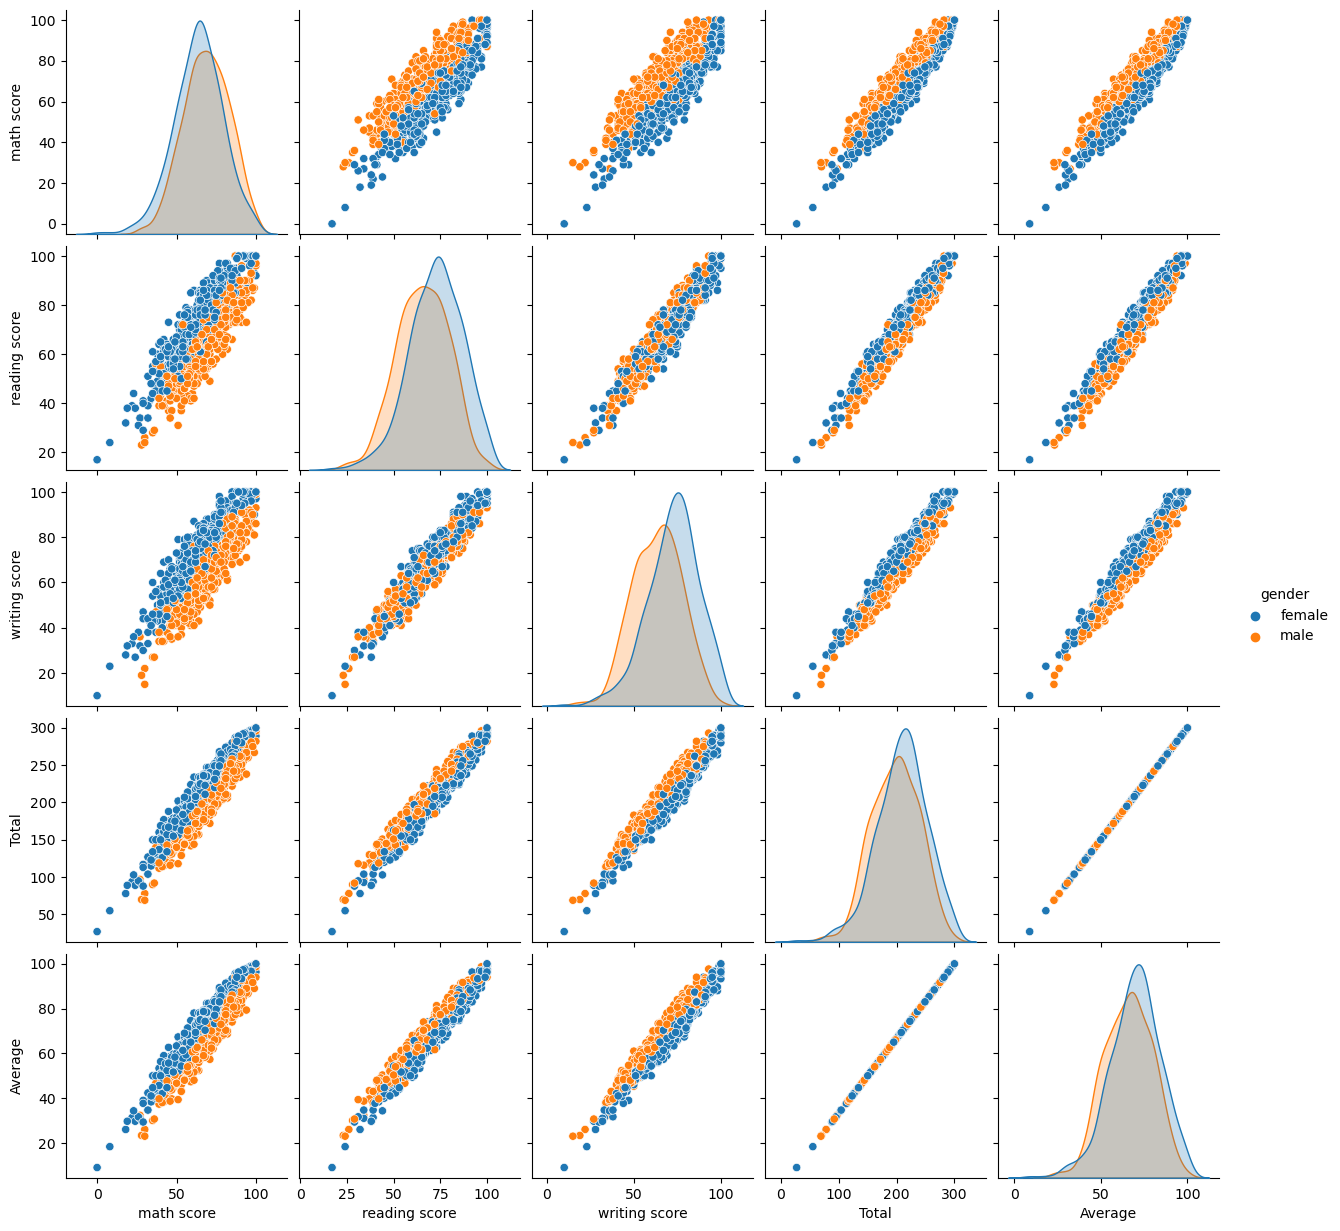

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


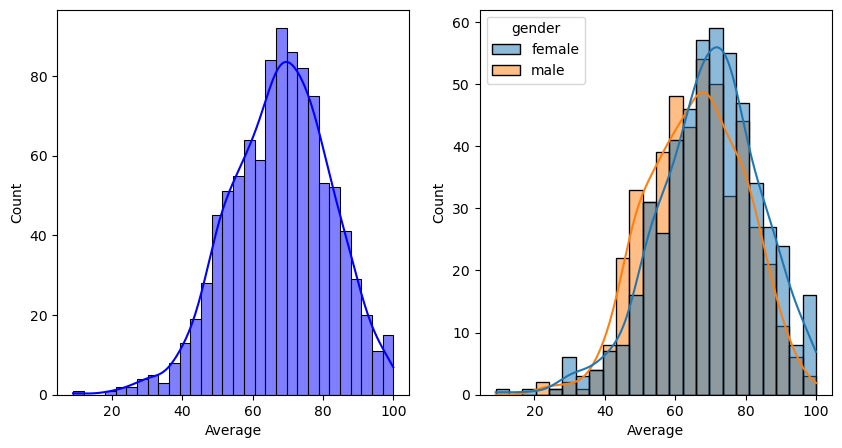

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(10, 5))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


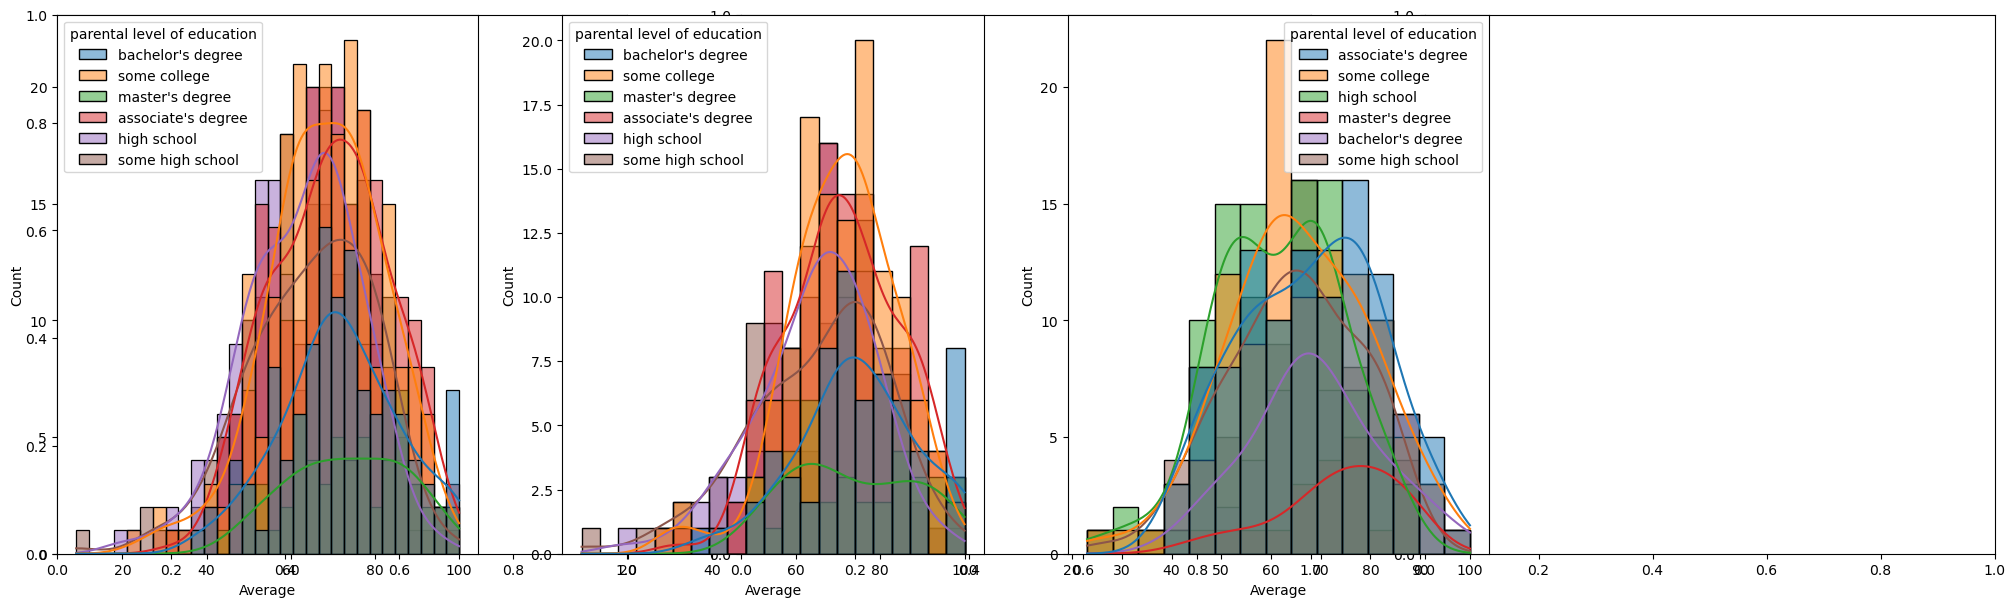

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(25, 7))
plt.subplot(141)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.show()

C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


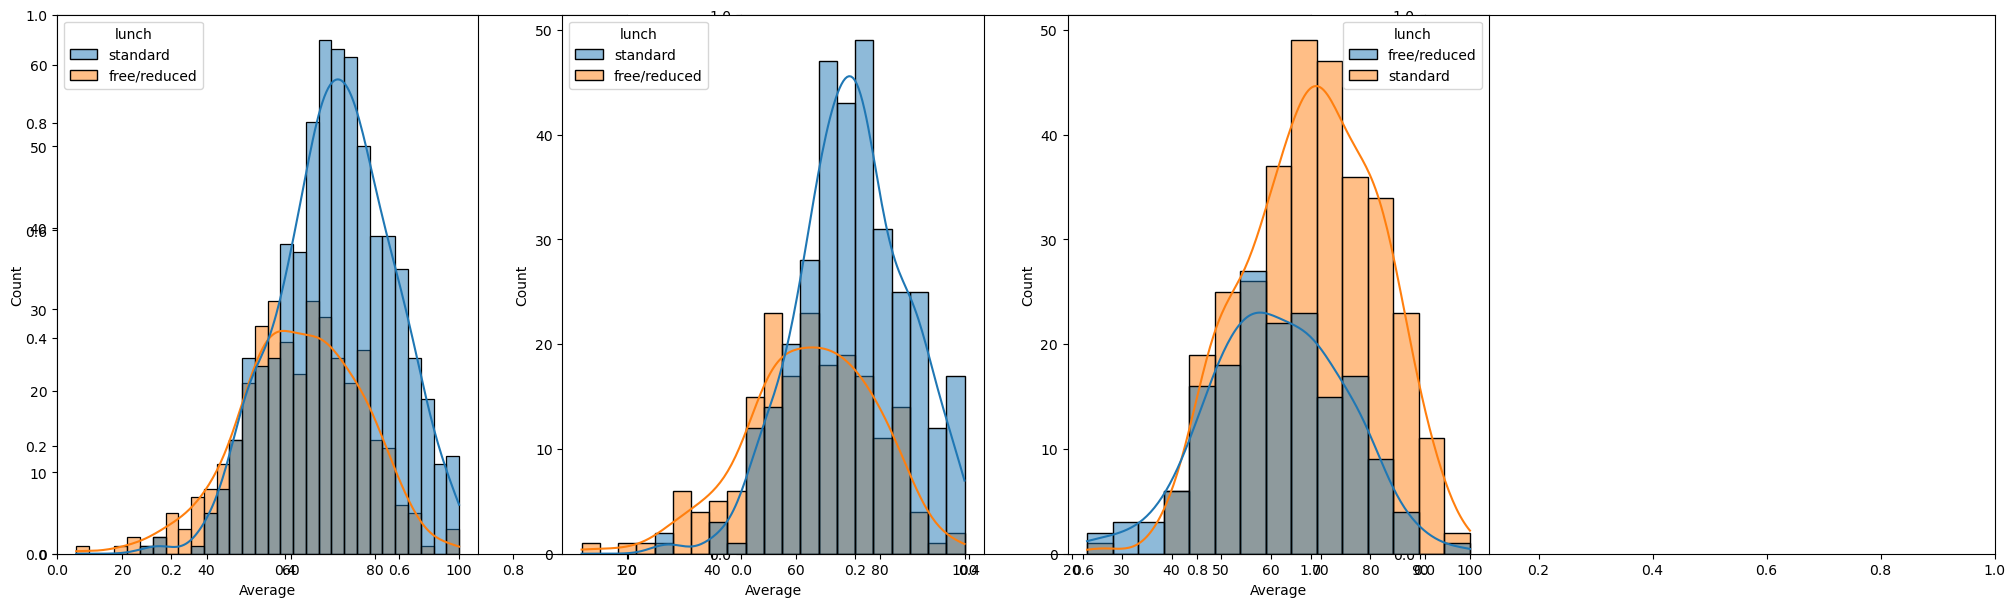

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(25, 7))
plt.subplot(141)
sns.histplot(data=df,x='Average',bins=30,kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

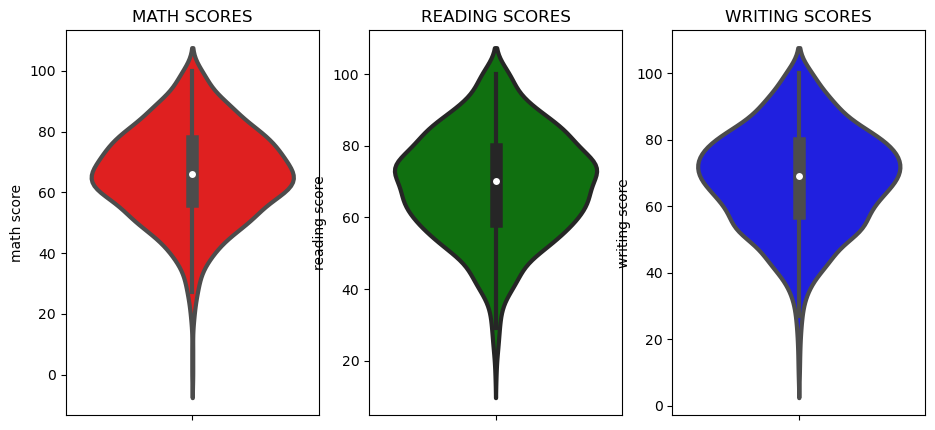

In [ ]:
#Create Violin plot of Scores
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Multivariate analysis using pieplot

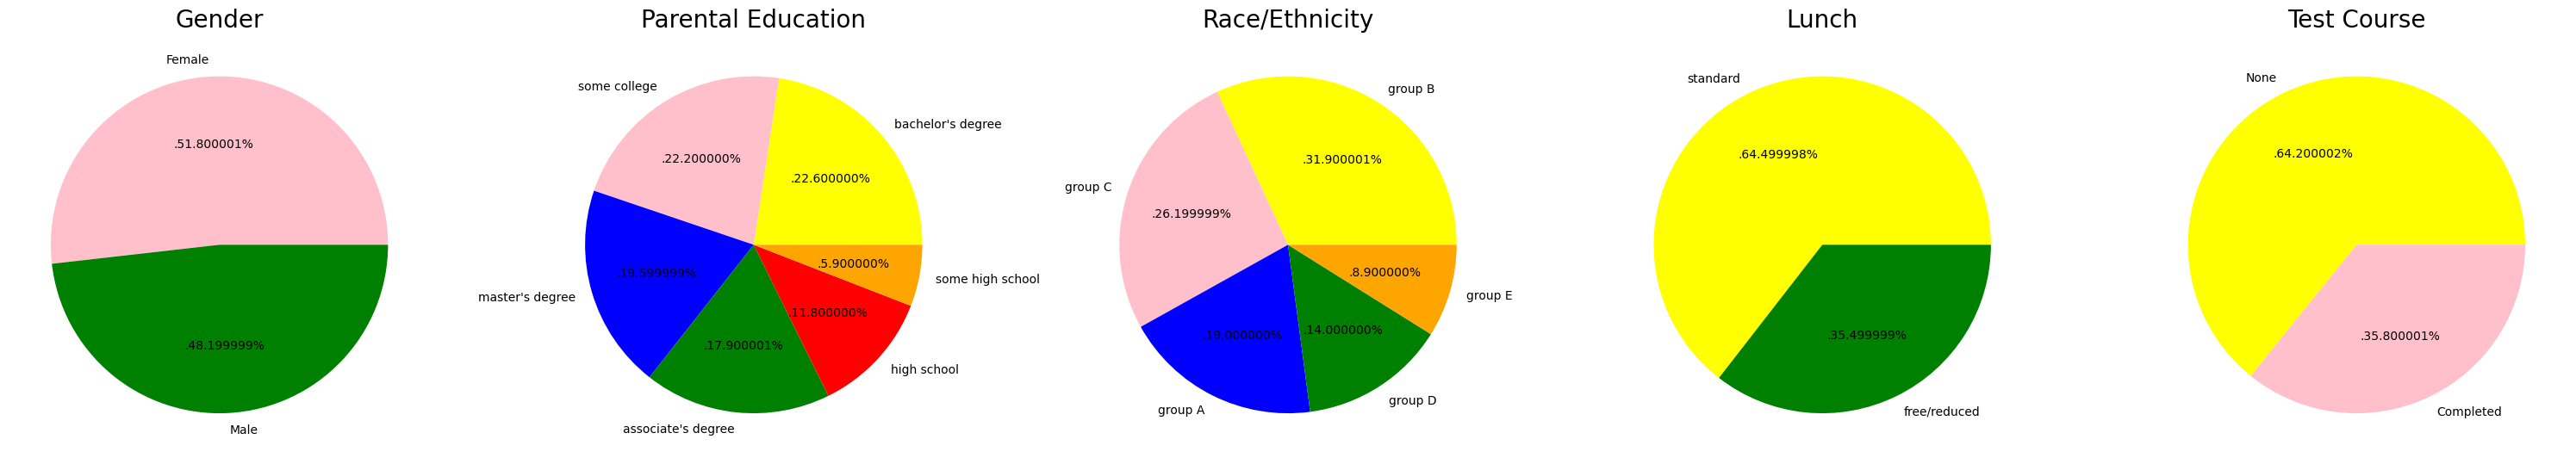

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

#generating plot for gender

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['pink','green']
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)

# generating plot for Parental Level of Education
plt.subplot(1, 5, 2)
size = df['parental level of education'].value_counts()
labels = "bachelor's degree", 'some college', "master's degree","associate's degree", 'high school', 'some high school'
color = "yellow","pink","blue", "green","red","orange"
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)

# generating plot for Race/Ethnicity
plt.subplot(1, 5, 3)
size = df['race/ethnicity'].value_counts()
labels = 'group B', 'group C', 'group A', 'group D', 'group E'
color = "yellow","pink","blue", "green","orange"
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
# generating plot for lunch
plt.subplot(1, 5, 4)
size = df['lunch'].value_counts()
labels = "standard", 'free/reduced'
color = "yellow", "green"
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)



plt.subplot(1, 5, 5)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['Yellow','pink']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')
plt.tight_layout()
plt.grid()
plt.show()

Feature Wise Visualization


UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

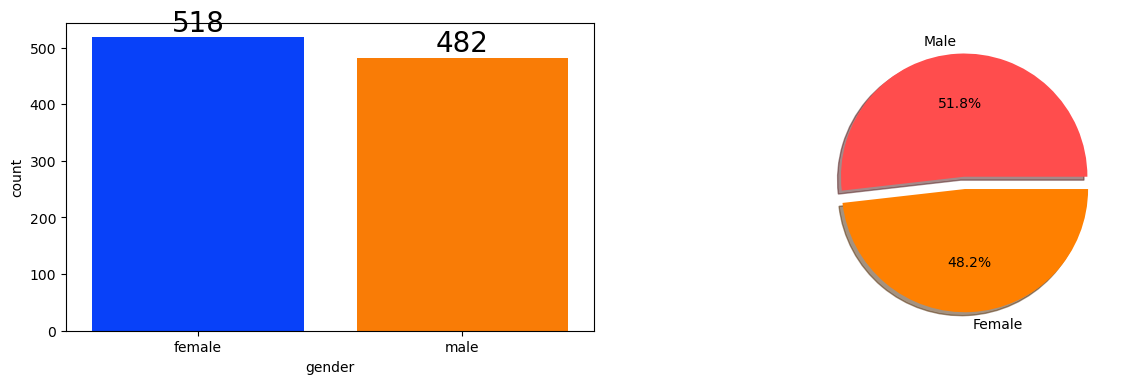

In [ ]:
f,ax =plt.subplots(1,2,figsize=(15,4))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

 RACE/EHNICITY COLUMN

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

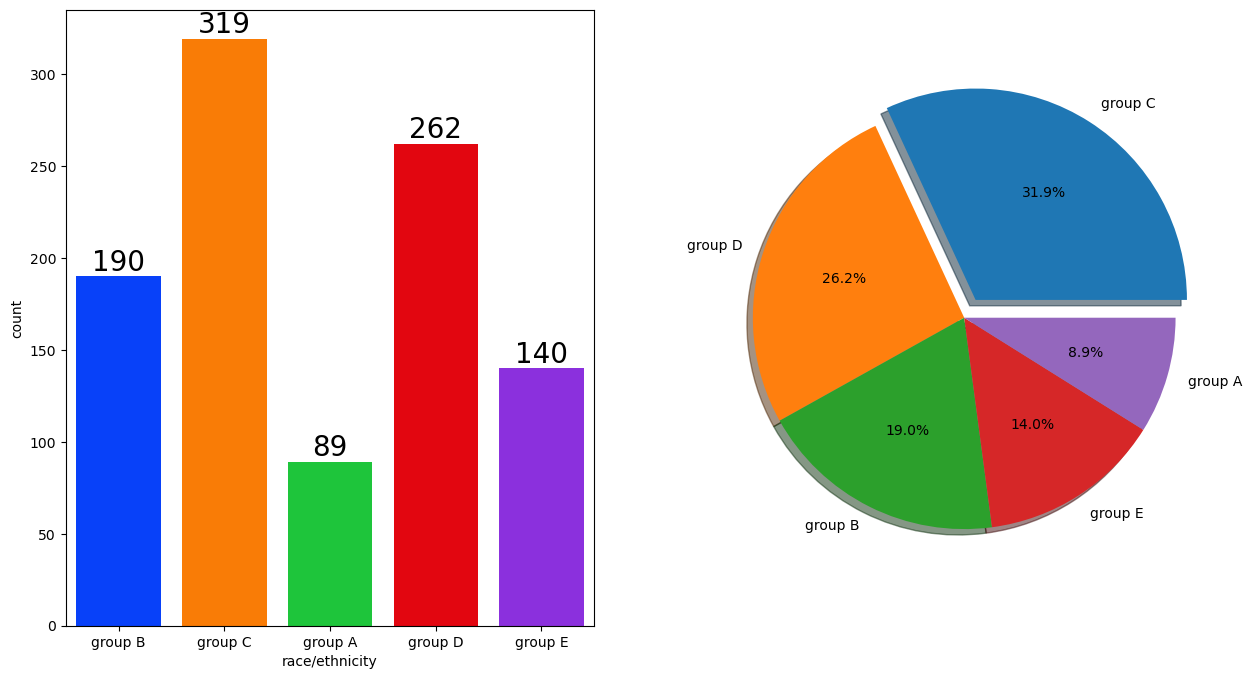

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Outlier

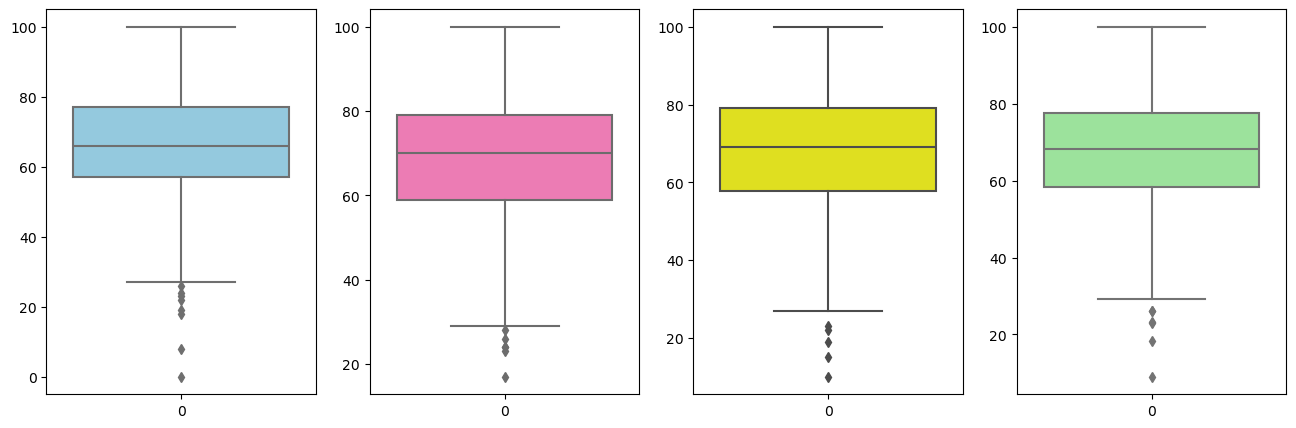

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()
